In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
apps = pd.read_csv("drive/MyDrive/Dataset/googleplaystore.csv")
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps.shape

(10841, 13)

In [ ]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
from dateutil import parser
s= 'April 25, 2020'
p = parser.parse(s)
p = p.strftime("%d/%m/%Y")
print(p)
print(type(p))

25/04/2020
<class 'str'>


In [ ]:
def Mapper(x):
  try:
    date = parser.parse(x) # datetime.datetime(2020, 4, 25, 0, 0)
    date_string = date.strftime("%d/%m/%Y")
    return date_string
  except:
    return np.nan

apps['Last Updated'] = apps['Last Updated'].map(Mapper)

In [ ]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
apps = apps.dropna(how = 'any')

apps.shape

(9360, 13)

In [ ]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated']) # format='%m-%d-%Y')

In [ ]:
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-07-01,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [ ]:
size_list = apps['Size'].to_list()
sizes = []
def extractingSize(item):
  count = 0
  try:
    s = item[:len(item) - 1]
    sizes.append(float(s))
    return float(s)
  except:
    count = count + 1
    pass

print(size_list[:6])
apps['Size'] = apps['Size'].map(extractingSize)

In [ ]:
9630 - len(sizes)

1907

In [ ]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-07-01,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-01-08,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-08-06,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
apps["Size"].astype('float64')

apps['Size'].isnull().sum()

1637

In [ ]:
apps = apps.dropna(how = 'any')

In [ ]:
s = '4.0.3'.split(".")
print(s[0] + "." + s[1] + s[2])

4.03


In [ ]:
print(len(apps['Type'].value_counts()))
apps['Type'].value_counts()

2


Free    7146
Paid     577
Name: Type, dtype: int64

In [ ]:
print(len(apps['Content Rating'].value_counts()))
apps['Content Rating'].value_counts()

6


Everyone           6166
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
print(len(apps['Genres'].value_counts()))
apps['Genres'].value_counts()

112


Tools                                  633
Entertainment                          448
Education                              417
Medical                                324
Action                                 322
                                      ... 
Education;Brain Games                    1
Arcade;Pretend Play                      1
Role Playing;Brain Games                 1
Card;Brain Games                         1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 112, dtype: int64

In [ ]:
print(len(apps['Category'].value_counts()))
apps['Category'].value_counts()

33


FAMILY                 1616
GAME                    974
TOOLS                   633
MEDICAL                 324
LIFESTYLE               280
PERSONALIZATION         278
FINANCE                 266
SPORTS                  247
BUSINESS                246
PHOTOGRAPHY             236
PRODUCTIVITY            235
HEALTH_AND_FITNESS      223
COMMUNICATION           211
SHOPPING                179
SOCIAL                  177
DATING                  173
NEWS_AND_MAGAZINES      169
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
VIDEO_PLAYERS           116
EDUCATION               110
MAPS_AND_NAVIGATION      95
ENTERTAINMENT            90
FOOD_AND_DRINK           84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(apps['Category'])
apps['Category'] = le.transform(apps['Category'])

In [ ]:
print(le.classes_) # ART_AND_DESIGN is given 1

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']


In [ ]:
le.fit(apps['Content Rating'])
apps['Content Rating'] = le.transform(apps['Content Rating'])

print(le.classes_)

['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']


In [ ]:
# [0 , 1, 2, 3, 4, 5]

In [ ]:
def ref2(x):
  if x == 'Paid':
    return 1
  else:
    return 0

apps['Type'] = apps['Type'].map(ref2)

In [ ]:
apps = apps.drop([ 'App','Genres', 'Current Ver'], axis = 1)

apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,0,4.1,159,19.0,"10,000+",0,0,1,2018-07-01,4.0.3 and up
1,0,3.9,967,14.0,"500,000+",0,0,1,2018-01-15,4.0.3 and up
2,0,4.7,87510,8.7,"5,000,000+",0,0,1,2018-01-08,4.0.3 and up
3,0,4.5,215644,25.0,"50,000,000+",0,0,4,2018-08-06,4.2 and up
4,0,4.3,967,2.8,"100,000+",0,0,1,2018-06-20,4.4 and up


In [ ]:
install_list = apps['Installs'].to_list()
installs = []
def extractingInstalls(x):
  for item in x:
    if not item.startswith("Varies"):
      s = str(item[:len(item) - 1])
      s = s.replace(",", "")
      installs.append(float(s))
    else:
      installs.append(1000.0)

extractingInstalls(install_list)
print(install_list[:6])
apps['Installs'] = installs

['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+']


In [ ]:
def ref3(x):
  return float(x)

apps['Reviews'] = apps["Reviews"].map(ref3)

In [ ]:
import datetime as dt

apps['year'] = apps['Last Updated'].dt.year
apps['month'] = apps['Last Updated'].dt.month
apps['day'] = apps['Last Updated'].dt.day

In [ ]:
ver_list = apps['Android Ver'].to_list()
ver = []
def extractingAndroid(x):
  for item in x:
    if not item.startswith("Varies"):
      s = str(item[:3])
      ver.append(float(s))
    else:
      ver.append(4.4)

extractingAndroid(ver_list)
print(ver_list[:6])
apps['Android Ver'] = ver

['4.0.3 and up', '4.0.3 and up', '4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up']


In [ ]:
price_list = apps['Price'].to_list()
prices = []
def extractingPrice(x):
  for item in x:
    if item != 0:
      s = item.replace("$", "")
      prices.append(float(s))
    else:
      prices.append(0.0)

extractingPrice(price_list)
print(price_list[:6])
apps['Price'] = prices

['0', '0', '0', '0', '0', '0']


In [ ]:
apps.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Android Ver       0
year              0
month             0
day               0
dtype: int64

In [ ]:
apps.head(25)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,year,month,day
0,0,4.1,159.0,19.0,10000.0,0,0.0,1,2018-07-01,4.0,2018,7,1
1,0,3.9,967.0,14.0,500000.0,0,0.0,1,2018-01-15,4.0,2018,1,15
2,0,4.7,87510.0,8.7,5000000.0,0,0.0,1,2018-01-08,4.0,2018,1,8
3,0,4.5,215644.0,25.0,50000000.0,0,0.0,4,2018-08-06,4.2,2018,8,6
4,0,4.3,967.0,2.8,100000.0,0,0.0,1,2018-06-20,4.4,2018,6,20
5,0,4.4,167.0,5.6,50000.0,0,0.0,1,2017-03-26,2.3,2017,3,26
6,0,3.8,178.0,19.0,50000.0,0,0.0,1,2018-04-26,4.0,2018,4,26
7,0,4.1,36815.0,29.0,1000000.0,0,0.0,1,2018-06-14,4.2,2018,6,14
8,0,4.4,13791.0,33.0,1000000.0,0,0.0,1,2017-09-20,3.0,2017,9,20
9,0,4.7,121.0,3.1,10000.0,0,0.0,1,2018-03-07,4.0,2018,3,7


In [ ]:
apps.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Android Ver       0
year              0
month             0
day               0
dtype: int64

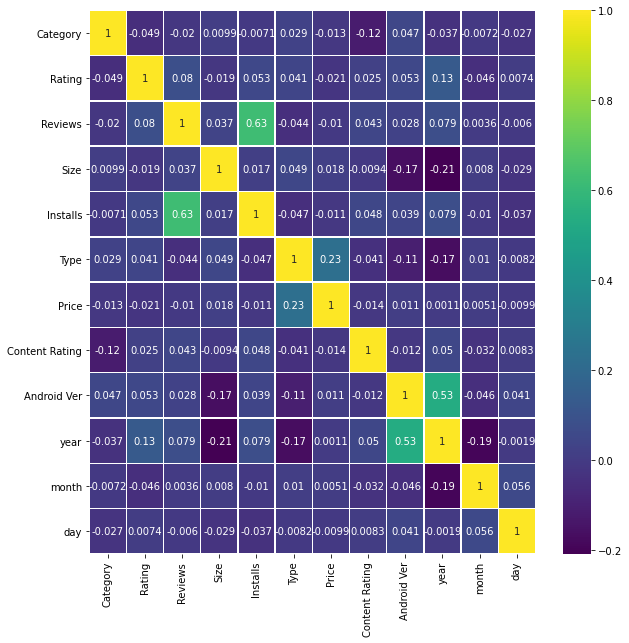

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(apps.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y = apps['Rating']
X = apps.drop(["Rating", "Last Updated", "Reviews", "Android Ver"], axis = 1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(X[:1000])

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit, y[:1000], test_size=0.2)

In [ ]:
random_model = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state = 42)

In [ ]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

89.3 %


In [ ]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

43.45 %


In [ ]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('drive/MyDrive/Dataset/Models/Apps.pickle','wb'))

saved_pca = pickle.dump(pca, open('drive/MyDrive/Dataset/Models/AppsPCA.pickle','wb'))